# Grupo 7


Integrantes:


Francisco RUA


Adrian KOZAMEH


Nicolás DA VIA


Diana INSAURRALDE

# Laboratorio 1: Regresión en Boston

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "Boston house prices dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

- Descripción del Dataset

In [ ]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

- Matriz con los datos de entrada (atributos)

In [ ]:
boston['data']  

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

- Vector de valores a predecir

In [ ]:
boston['target']  

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

-  Nombres de los atributos para cada columna de 'data'

In [ ]:
boston['feature_names'] 

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

- Vemos cómo está conformada la matriz de atributos.

In [ ]:
boston['data'].shape

(506, 13)

- Vemos el número de valores a predecir

In [ ]:
len(boston['target'])

506

- Realizamos una visualización como DataFrame

In [ ]:
#Definimos nuestro DataFrame
df = pd.DataFrame(boston.data)

#Agregamos los atributos como columnas al DataFrame
df.columns = boston.feature_names

#Agregamos la variable objetivo al DataFrame
df['MEDV'] = boston.target 

#Observamos el encabezado del DataFrame
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
#Hacemos una revisión de los estadísticos
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [ ]:
from sklearn.model_selection import train_test_split
X, y = boston['data'], boston['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((404, 13), (102, 13))

## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

**No hace falta escribir código para responder estas preguntas.**

1. El conjunto de datos trata sobre un conjunto de variables o atributos que inciden en la formación de precios de los inmuebles en la ciudad de Boston. Los datos fueron publicados originalmente por Harrison y Rubinfeld, «Hedonic prices and the demand for clean air», en el año 1978.

2. La variable objetivo que hay que predecir es la del valor de la mediana de los hogares ocupados por sus dueños en unidades de U$S1000 en la ciudad de Boston (MEDV). La estimamos identificando la importancia relativa de cada atributo en el valor asignado por el mercado a un bien raíz, mediante lo cual es posible determinar cómo cambiará dicho valor al variar la cantidad y calidad en que se encuentra presente cada uno de estos atributos, y consecuentemente, poder predecir el precio del mismo. 

3. Entre los atributos disponibles para hacer la predicción del mismo podemos nombrar 13 (trece) existentes:
- CRIM: Tasa de criminalidad per capita por ciudad.
- ZN: Proporción de zonas residenciales para lotes de más de 25.000 pies cuadrados.
- INDUS: Proporción de áreas industriales por ciudad.
- CHAS: Variable Dummy Charles River (en regresión las variables Dummy asumen los valores 1 o 0. Si el tramo limita con el río adopta el valor 1, de lo contrario adopta el valor 0).
- NOX: Concentración de Óxido Nítrico (zonas cada 10 millones de habitantes).
- RM: Número promedio de ambientes por vivienda.
- AGE: Proporción de unidades ocupadas por sus dueños, construidas antes de 1940.
- DIS: Distancias ponderadas a cinco centros laborales de Boston.
- RAD: Índice de accesibilidad a carreteras radiales.
- TAX: Valor total del impuesto inmobiliario cada 10.000 dólares.
- PTRATIO: Ratio alumno-maestro por ciudad.
- B:1000(Bk - 0.63)^2 donde Bk es la proporción de "negros" por ciudad.
- LSTAT: Porcentaje de la población de bajos recursos.

4. Dado que la variable que queremos predecir es 'MEDV' a priori podríamos decir que los atributos más determinantes que suponemos para la predicción van
a ser:
  - 'CRIM', ya que mide la incidencia de la inseguridad en el precio de los inmuebles.
  - 'TAX', debido a los impuestos inmobiliarios que se pagan.
  - 'DIS', por las distancias a los centros laborales.

5. Para el conjunto de datos existe principalmente un sesgo tanto estadístico como racial a la hora de contemplar el precio hedónico. El atributo 'R' contiene un sesgo estadístico desde el punto de vista que no se tiene en cuenta a la población neutral, haciendo referencia a la población afroamericana en el análisis, término que debería utilizarse para evitar el problema ético que produce el sesgo racial, ya que ofensivamente se refieren a ellos como "negros".
Otro de los sesgos observados, tiene que ver con aquella población que no es propietaria de inmuebles, sino más bien son arrendados por ellos y no están siendo tenidos en cuenta.
También podemos observar que los datos han sido censados, ya que cuando se visualizan los mismos, los inmuebles cuentan con un precio límite de 50.000 dólares.


## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

- Realizamos una gráfica para cada atributo de entrada.

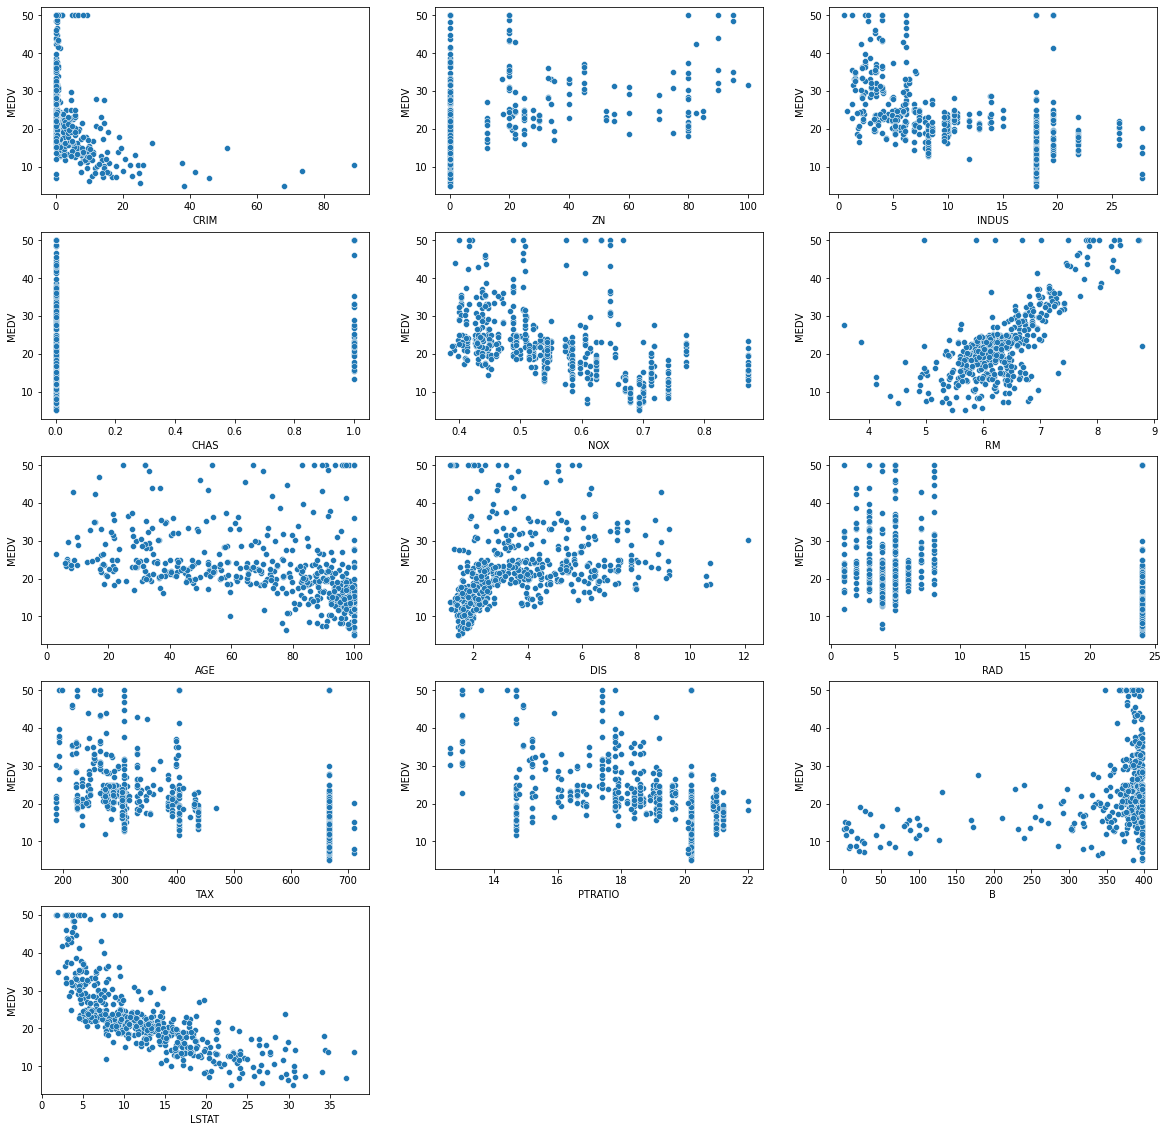

In [ ]:
import math

features = boston.feature_names

# Creamos diseño general
n_cols = 3
n_rows = 5

fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 20))

for i, feature in enumerate(features):
    # Calculamos filas y columnas
    row = math.floor(i / n_cols)
    col = i % n_cols
    # Configuramos visualización
    ax = axs[row, col]
    # Visualizamos la distribución de variables
    sb.scatterplot(data=df, x=feature, y='MEDV', ax=ax)

# Limpiamos gráficos vacíos
for col in range(n_cols):
    for row in range(n_rows):
        if not axs[row, col].has_data():
            axs[row, col].axis('off')

- Luego de estudiar los atributos y su relación con la variable objetivo a simple vista, podríamos decir que aquellas que resultan más informativas para la predicción son:

  - 'RM': a simple vista podemos observar que a mayor número promedio de ambientes, mayor es el valor que obtenemos de 'MEDV'.
  - 'LSTAT': existe a simple vista una relación inversamente proporcional con respecto al valor de las medianas de los inmuebles ocupados por sus dueños. Si la población de bajos recursos es baja, el valor del inmueble aumenta y si la misma población aumenta, el precio tiende a disminuir.
  - 'AGE': en menor medida y con una mayor dispersión en los datos observados, se podría predecir que a medida que la antigüedad del inmueble es mayor, disminuye el valor de la propiedad.
 

## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

In [ ]:
# 1. Seleccionamos el atributo:

feature = 'LSTAT'  
selector = (boston['feature_names'] == feature)
X_train_f = X_train[:, selector]
X_test_f = X_test[:, selector]
X_train_f.shape, X_test_f.shape

((404, 1), (102, 1))

In [ ]:
# 2. Instanciamos y entrenamos.

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Regresión Lineal
degree = 1

pf = PolynomialFeatures(degree)
lr = LinearRegression(fit_intercept=False) # bias ya es un feature

model = make_pipeline(pf, lr)

In [ ]:
model.fit(X_train_f, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=1)),
                ('linearregression', LinearRegression(fit_intercept=False))])

In [ ]:
lr.coef_

array([34.76519272, -0.95648761])

In [ ]:
# 3. Predecimos y evaluamos.

from sklearn.metrics import mean_squared_error

y_train_prediction = model.predict(X_train_f)
y_test_prediction = model.predict(X_test_f)

train_error = mean_squared_error(y_train, y_train_prediction)
test_error = mean_squared_error(y_test, y_test_prediction)

print(f'Train error: {train_error:0.5}')
print(f'Test error: {test_error:0.5}')

Train error: 36.524
Test error: 46.336


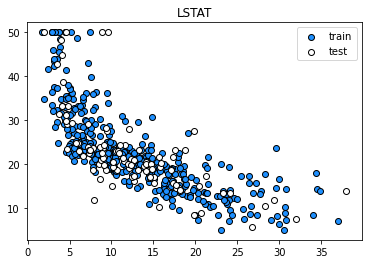

In [ ]:
# 4. Graficamos acá:

x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)
# plt.plot(x, model.predict(x), color="tomato", label="modelo")

plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
plt.title(feature)
plt.legend()
plt.show()

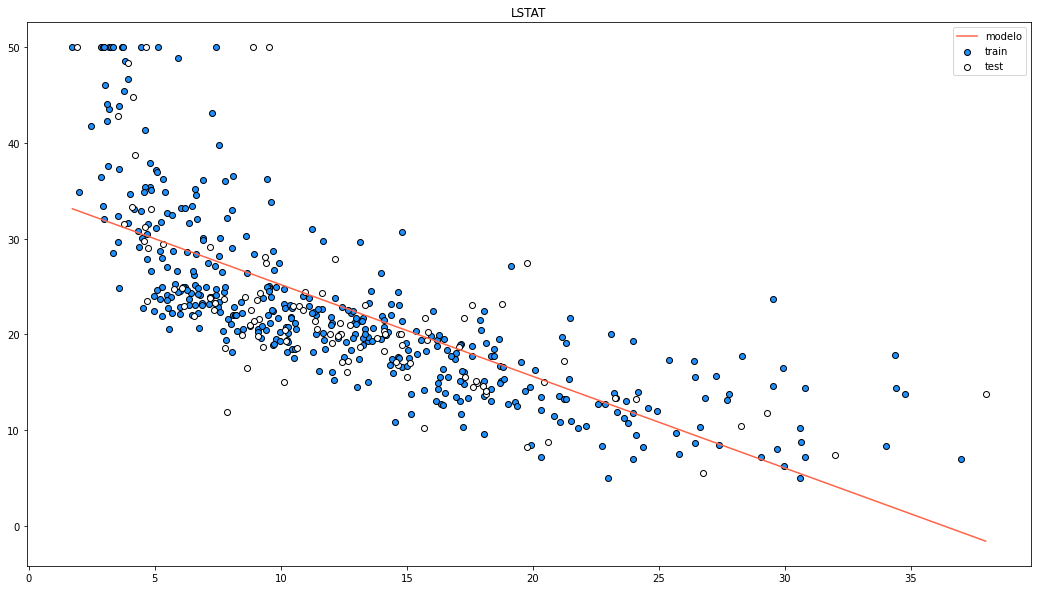

In [ ]:
# Definimos límites del gráfico
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)

fig = plt.figure(figsize=(18, 10))

# Predicción de nuestro modelo
plt.plot(x, model.predict(x), color='tomato', label='modelo')

# Datos de entrenamiento y test
plt.scatter(X_train_f, y_train, facecolor='dodgerblue', edgecolor='k', label='train')
plt.scatter(X_test_f, y_test, facecolor='white', edgecolor='k', label='test')

plt.title(feature)
plt.legend()
plt.show()

- Dado el atributo seleccionado 'LSTAT', podemos concluir que nuestro modelo se ajusta de una manera significativa a las pruebas para la predicción de precios. 

## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

In [ ]:
# 1. Selección de Hiperparámetro (Grado).

train_errors = []
test_errors = []
degrees = range(10)

for degree in degrees:
    # Entrenamiento:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr)
    model.fit(X_train_f, y_train)

    # Predicción:
    y_train_pred = model.predict(X_train_f)
    y_test_pred = model.predict(X_test_f)

    # Evaluación:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)
    print(f'Degree {degree} | Train Error {train_error:0.3f} | Test Error {test_error:0.3f}')

Degree 0 | Train Error 85.144 | Test Error 81.582
Degree 1 | Train Error 36.524 | Test Error 46.336
Degree 2 | Train Error 28.189 | Test Error 38.847
Degree 3 | Train Error 26.785 | Test Error 37.224
Degree 4 | Train Error 25.849 | Test Error 34.705
Degree 5 | Train Error 25.035 | Test Error 34.835
Degree 6 | Train Error 25.014 | Test Error 34.326
Degree 7 | Train Error 25.014 | Test Error 34.261
Degree 8 | Train Error 24.846 | Test Error 36.415
Degree 9 | Train Error 24.826 | Test Error 34.916


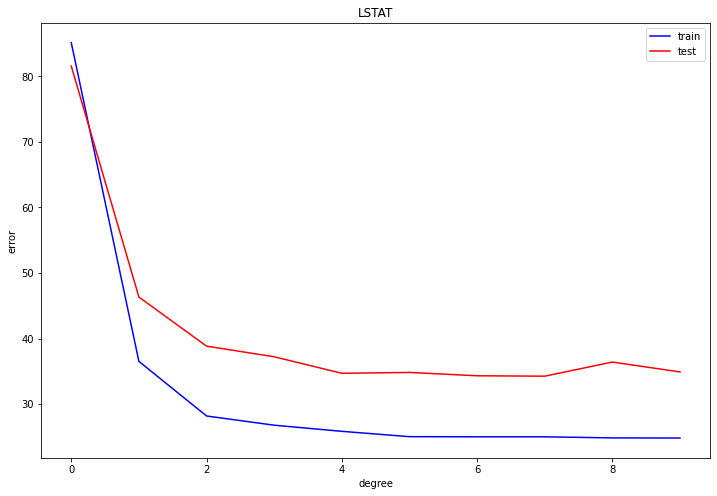

In [ ]:
# 2. Graficamos curvas de error acá.

fig = plt.figure(figsize=(12, 8))

plt.plot(degrees, train_errors, color='blue', label='train')
plt.plot(degrees, test_errors, color='red', label='test')

plt.title(feature)
plt.legend()
plt.xlabel('degree')
plt.ylabel('error')
plt.show()

- Observando las curvas de error podemos observar que se comienza a sobreajustar a partir del grado 2.

In [ ]:
# 4. Reconstruimos un mejor modelo acá y graficamos.

degree = 2

pf = PolynomialFeatures(degree)
lr = LinearRegression(fit_intercept=False) # bias ya es un feature

model = make_pipeline(pf, lr)

model.fit(X_train_f, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression(fit_intercept=False))])

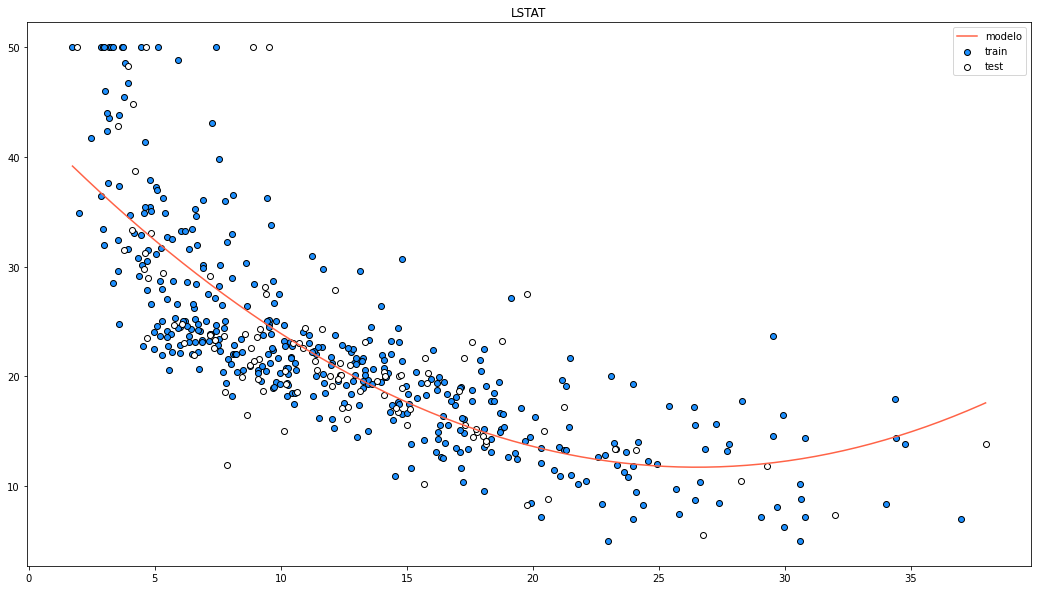

In [ ]:
#Visualización

# Definimos límites del gráfico
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)

fig = plt.figure(figsize=(18, 10))

# Predicción de nuestro modelo
plt.plot(x, model.predict(x), color='tomato', label='modelo')
# Datos de entrenamiento y test
plt.scatter(X_train_f, y_train, facecolor='dodgerblue', edgecolor='k', label='train')
plt.scatter(X_test_f, y_test, facecolor='white', edgecolor='k', label='test')

plt.title(feature)
plt.legend()
plt.show()

Concluimos en que existe cierto grado de correlación (inversamente proporcional) entre los features LSTAT y MEDV, ya que los datos son significativamente lineales. Por lo tanto, con un polinomio de grado 1 o 2 somos capaces de obtener un buen modelo.

Al contrario, al aumentar el grado de nuestro modelo, se comienza a producir sobreajuste. Lo cual se observa al analizar los resultados obtenidos.

## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

In [ ]:
# Seleccionamos los atributos 'LSTAT' y 'RM'
feature1 = 'LSTAT'
feature2 = 'RM'
selector = (boston['feature_names'] == feature1) | (boston['feature_names'] == feature2)

X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]

X_train_fs.shape, X_test_fs.shape

((404, 2), (102, 2))

In [ ]:
# 2. Selección de hiperparámetro (grado).

train_errors = []
test_errors = []
degrees = range(1, 10)

for degree in degrees:
    # Entrenamiento:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr)
    model.fit(X_train_fs, y_train)

    # Predicción:
    y_train_pred = model.predict(X_train_fs)
    y_test_pred = model.predict(X_test_fs)

    # Evaluación:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)
    print(f'Degree {degree} | Train Error {train_error:0.3f} | Test Error {test_error:0.3f}')

Degree 1 | Train Error 28.790 | Test Error 37.383
Degree 2 | Train Error 18.659 | Test Error 28.145
Degree 3 | Train Error 17.078 | Test Error 28.567
Degree 4 | Train Error 14.189 | Test Error 33.999
Degree 5 | Train Error 12.906 | Test Error 34.201
Degree 6 | Train Error 12.352 | Test Error 34.925
Degree 7 | Train Error 12.206 | Test Error 70.260
Degree 8 | Train Error 11.943 | Test Error 545.382
Degree 9 | Train Error 12.195 | Test Error 1105.409


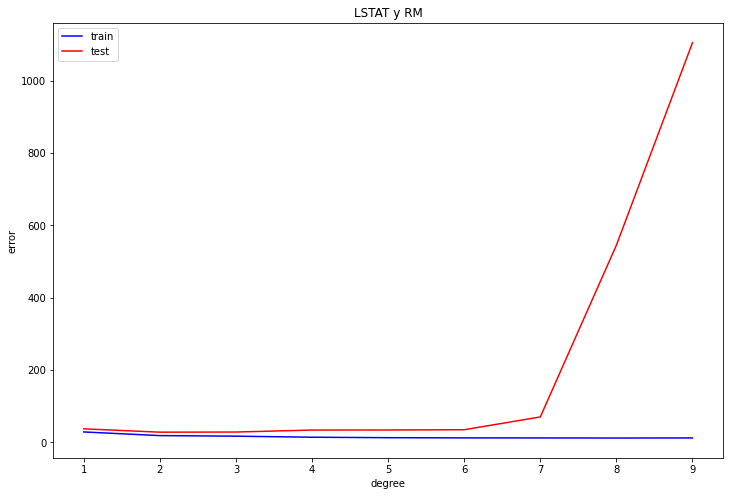

In [ ]:
# Análisis de errores

fig = plt.figure(figsize=(12, 8))

plt.plot(degrees, train_errors, color='blue', label='train')
plt.plot(degrees, test_errors, color='red', label='test')

plt.title(feature1 + ' y ' + feature2)
plt.legend()
plt.xlabel('degree')
plt.ylabel('error')
plt.show()

- Podemos observar que el modelo comienza a sobreajustarse a partir del grado 3. El modelo que mejor se ajusta lo hace en grado 2 y a su vez haciendo una regresión con más de un atributo se ve que el error del conjunto de test disminuyó de 38.847 a 28.145.
Al contar con mayor información (más de un atributo) para predecir la variable objetivo podemos decir que encontramos un mejor modelo  al no depender la variable MEDV de un solo atributo, por lo que contar con información extra de un atributo permite que nuestro modelo cuente con más datos a la hora de predecir precios de propiedades

## Más ejercicios (opcionales)

### Ejercicio 6: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.

### Ejercicio 7: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?


In [ ]:
#Ejercicio 6

# Seleccionamos todos los atributos
X_train_all = X_train
X_test_all = X_test

X_train_all.shape, X_test_all.shape

((404, 13), (102, 13))

In [ ]:
#Selección de hiperparámetros (grados)
train_errors = []
test_errors = []
degrees = range(1, 7)

for degree in degrees:
    # Entrenamiento:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr)
    model.fit(X_train_all, y_train)

    # Predicción:
    y_train_pred = model.predict(X_train_all)
    y_test_pred = model.predict(X_test_all)

    # Evaluación:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)
    print(f'Degree {degree} | Train Error {train_error:10.3f} | Test Error {test_error:10.3f}')

Degree 1 | Train Error     19.326 | Test Error     33.449
Degree 2 | Train Error      4.340 | Test Error     31.278
Degree 3 | Train Error      0.000 | Test Error 976575.880
Degree 4 | Train Error      0.000 | Test Error 950756.907
Degree 5 | Train Error      0.000 | Test Error 195453.639
Degree 6 | Train Error      0.000 | Test Error 200691.242


- Como podemos observar el modelo se empieza a sobreajustar a partir del grado 3. Con el grado 2 obtenemos el modelo que mejor se ajusta, con un error en el conjunto de test de 31.278.
Al utilizar todos los atributos, obtenemos un rendimiento peor a cuando solo utilizábamos los features que considerábamos más relevantes para la predicción (donde se consiguió un error de 28.145). Es posible que la causa de esta particularidad sea que existen ciertos atributos en el conjunto de datos que no aportan información, e incluso entorpecen el aprendizaje al no estar relacionados con la variable a predecir. Un ejemplo podría ser la variable CHAS.

In [ ]:
# Ejercicio 7

#Selección de Hiperparámetro (Alpha)

from sklearn.linear_model import Ridge

train_errors = []
test_errors = []
degree = 9
alphas = [0.0001, 0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1, 1.5, 2]

for alpha in alphas:
    # train:
    pf = PolynomialFeatures(degree, include_bias=False)
    rd = Ridge(alpha=alpha, normalize=True) # Normalizamos para evitar 'ill-conditioned matrix'.
    model = make_pipeline(pf, rd)
    model.fit(X_train_fs, y_train)

    # predict:
    y_train_pred = model.predict(X_train_fs)
    y_test_pred = model.predict(X_test_fs)

    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)
    print(f'Alpha {alpha:6.4f} | Train Error {train_error:0.3f} | Test Error {test_error:0.3f}')

Alpha 0.0001 | Train Error 14.314 | Test Error 30.122
Alpha 0.0010 | Train Error 15.693 | Test Error 29.572
Alpha 0.0100 | Train Error 17.251 | Test Error 28.729
Alpha 0.1000 | Train Error 18.629 | Test Error 28.529
Alpha 0.2500 | Train Error 19.026 | Test Error 28.213
Alpha 0.5000 | Train Error 19.493 | Test Error 27.942
Alpha 0.7500 | Train Error 19.925 | Test Error 27.842
Alpha 1.0000 | Train Error 20.345 | Test Error 27.833
Alpha 1.5000 | Train Error 21.175 | Test Error 27.980
Alpha 2.0000 | Train Error 22.002 | Test Error 28.274


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

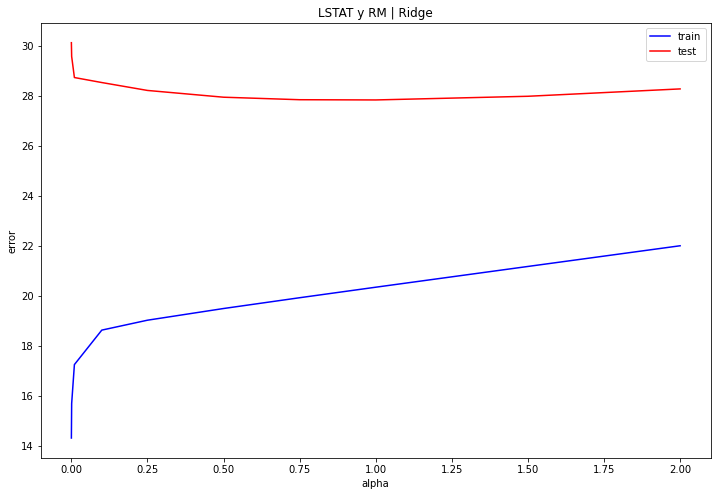

In [ ]:
#Análisis de errores

fig = plt.figure(figsize=(12, 8))

plt.plot(alphas, train_errors, color='blue', label='train')
plt.plot(alphas, test_errors, color='red', label='test')

plt.title(feature1 + ' y ' + feature2 + ' | ' + 'Ridge')
plt.legend()
plt.xlabel('alpha')
plt.ylabel('error')
plt.show()

- Fijando el grado del modelo a 9 (con el que se observó el mayor sobreajuste), obtuvimos los resultados anteriores.
Con una regularización de 1, se obtuvo el mejor modelo con un error de test de 27.833 en comparación al error de test sin regularización que fue de 1109.154.